<h2 style="text-align: center;">  OLRE</h2>

In [1]:
import os
os.chdir('..')

In [2]:
from Models import *
from Models.Offline_LRE import *
import matplotlib.pyplot as plt
from Experiments import *
from Evaluation import *
import numpy as np
import scipy
from scipy.special import logsumexp

The goal of this jupyter notebook is to illustrate how to use OLRE

In [4]:
data_ref_validation=np.random.uniform(-np.sqrt(3),np.sqrt(3),size=10000)
data_test_validation=np.random.laplace(loc=0,scale=np.sqrt(0.5),size=10000)

In [5]:
#### Real likelihood-ratio
def r_uniform_laplace(x,alpha):
    log_r_alpha=alpha*scipy.stats.laplace.pdf(x,loc=0,scale=np.sqrt(0.5))+(1-alpha)*scipy.stats.uniform.pdf(x,loc=-np.sqrt(3),scale=2*np.sqrt(3))
    log_r_alpha[log_r_alpha<=0]=1e-16
    log_r_alpha=-1*np.log(log_r_alpha)
    log_r_alpha+=scipy.stats.laplace.logpdf(x,loc=0,scale=np.sqrt(0.5))
    return np.exp(log_r_alpha)

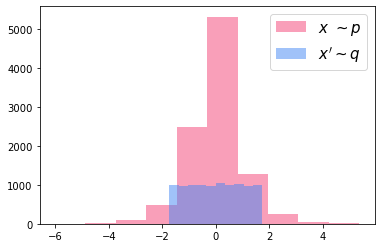

In [7]:
##### Data distributions
plt.hist(data_test_validation,alpha=0.5,color="#f44174",label=r'$x \ \sim p$')
plt.hist(data_ref_validation,alpha=0.5,color="#4286f4",label=r"$x' \sim q$")
plt.tick_params(axis="x", labelsize=10) 
plt.tick_params(axis="y", labelsize=10) 
plt.legend(fontsize=15)

Text(0.5, 1.0, 'Relative Likelihood-Ratio $\\alpha=$0.1')

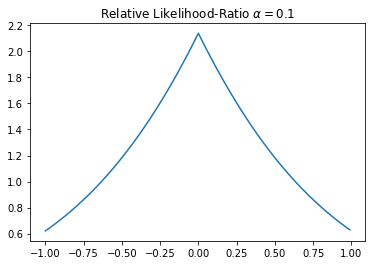

In [8]:
alpha=0.1
x=np.arange(-1.0,1.0,1/100)
y= r_uniform_laplace(x,alpha=alpha)
plt.plot(x,y)
plt.tick_params(axis="x", labelsize=10) 
plt.tick_params(axis="y", labelsize=10) 
plt.title(r"Relative Likelihood-Ratio $\alpha=$"+str(alpha))

In [17]:
data_ref=np.random.uniform(-np.sqrt(3),np.sqrt(3),size=10000)
data_test=np.random.laplace(loc=0,scale=np.sqrt(0.5),size=10000)
########### OLRE
t_0=100 ### Warming period 
alpha=0.1 ### regularized parameter 
r=0.5 ### smothness parameter(should be between 0.5 and 1 to guarantee convergence)
learning_rate=lambda t: 4.0/((t+t_0)**((2*r)/(2*r+1)))
regularization=lambda t: 1/(4*(t+t_0)**(1/(2*r+1)))
list_dictionaries_OLRE,list_thetas_OLRE,Kernel_OLRE=OLRE(data_ref,data_test,t_0,learning_rate,regularization,alpha=alpha)

In [18]:
x=np.arange(np.mean(data_ref)-1.5*np.std(data_ref),np.mean(data_ref)+1.5*np.std(data_ref),1/100)
y= r_uniform_laplace(x,alpha)
y_estimate_OLRE=r_estimate(x,Kernel_OLRE,list_dictionaries_OLRE[len(list_dictionaries_OLRE)-1],list_thetas_OLRE[len(list_thetas_OLRE)-1])

Text(0.5, 1.0, 'Relative Likelihood-Ratio $\\alpha=$0.1')

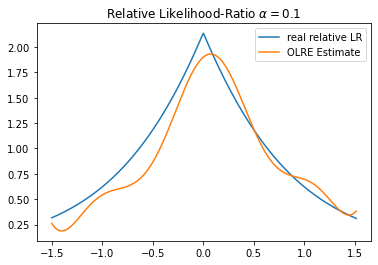

In [19]:
##### Real Likelihood-ratio
alpha=0.1
plt.plot(x,y,label="real relative LR")
plt.plot(x,y_estimate_OLRE,label="OLRE Estimate")
plt.tick_params(axis="x", labelsize=10) 
plt.tick_params(axis="y", labelsize=10) 
plt.legend()
plt.title(r"Relative Likelihood-Ratio $\alpha=$"+str(alpha))

In [20]:
########## Convergence 
data_ref_validation=np.random.uniform(-np.sqrt(3),np.sqrt(3),size=10000)
data_test_validation=np.random.laplace(loc=0,scale=np.sqrt(0.5),size=10000)   
reduced_list_dictionaries_OLRE=[list_dictionaries_OLRE[i] for i in range(0,len(list_dictionaries_OLRE),100)]
reduced_list_thetas_OLRE=[list_thetas_OLRE[i] for i in range(0,len(list_thetas_OLRE),100)]
errors_PEARSON_OLRE,L2_distance_OLRE=error_graph(data_ref_validation,data_test_validation,reduced_list_dictionaries_OLRE,reduced_list_thetas_OLRE,Kernel_OLRE,
                                                 real_likelihood=lambda x: r_uniform_laplace(x,alpha=alpha),alpha=alpha)

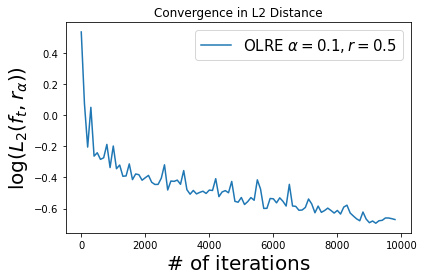

In [24]:
plt.title("Convergence in L2 Distance")
plt.plot(np.arange(0,10000-100,100),np.log(L2_distance_OLRE),label=r'OLRE $\alpha=0.1,r=0.5$')
plt.ylabel(r'$\log(L_2(f_t,r_{\alpha}))$',fontsize=20)
plt.xlabel(r'$\#$ of iterations',fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()